In [1]:
import json
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

In [2]:
# Opening JSON file
f = open('syntax_gym_all_info_base32_400_pos_tagged.csv')
 
# returns JSON object as 
# a dictionary
data = json.load(f)
 
# Closing file
f.close()


# Preprocessing

In [3]:
def string_to_tuple(string):
    # Remove parentheses and split by comma and strip quotes
    parts = string.strip("()").split(", ")
    word = parts[0].strip("''")
    index = int(parts[1])
    pos_tag = parts[2].strip("''")
    return word, index, pos_tag

def preprocess(data):
    int_data = {}
    for key, val in data.items():
        new_routes = {}
        int_key = int(key)
        for key2, val2 in val.items():
            new_key = string_to_tuple(key2)
            new_routes[new_key] = val2
        int_data[int_key] = new_routes
    return int_data

In [4]:
int_data = preprocess(data)

# Overall Layer Specs

In [5]:
pos_tag_routes = {}
pos_tag_names = defaultdict(list)

for key, val in int_data.items():
    for inner_key, inner_val in val.items():
        token_name, pos_tag = inner_key[0], inner_key[2]
        if pos_tag not in pos_tag_routes:
            pos_tag_routes[pos_tag] = [[] for _ in range(6)]
        pos_tag_names[pos_tag].append(token_name)
        for i, (step, route) in enumerate(inner_val):
            pos_tag_routes[pos_tag][i].append(route)

In [6]:
pos_tag_counts = defaultdict(list)
for key, val in pos_tag_routes.items():
    for i, array in enumerate(val):
        pos_tag_counts[key].append(Counter(array))
#         print(f"Counts for {key} in layer {i*2 + 1}:")
#         print(Counter(array))
#         print(" ")

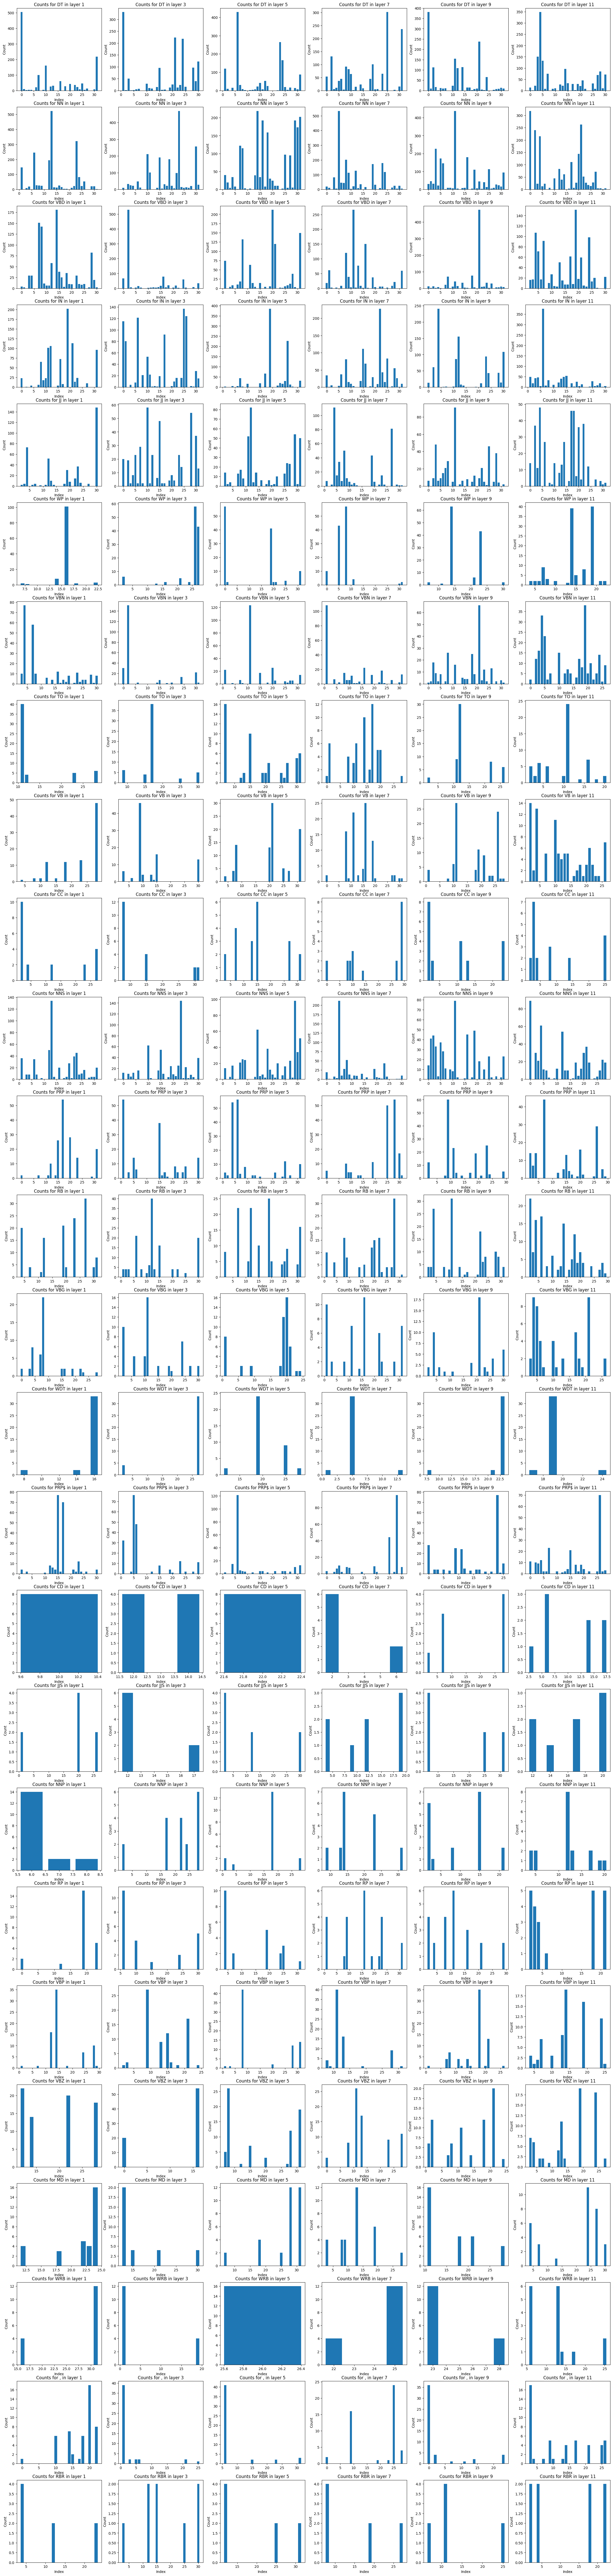

In [7]:
# Determine the layout of the subplot grid
num_pos_tags = len(pos_tag_counts)
num_layers = max(len(layers) for layers in pos_tag_counts.values())

# Set up the matplotlib figure and axes, based on the number of layers
fig, axes = plt.subplots(num_pos_tags, num_layers, figsize=(20, 10))
if num_pos_tags == 1:
    axes = np.array([axes])
elif num_layers == 1:
    axes = np.array([axes]).T

# Plot each Counter object
for i, (pos_tag, layers) in enumerate(pos_tag_counts.items()):
    for j, layer in enumerate(layers):
        # Sort the keys for consistent plotting
        keys = sorted(layer.keys())
        counts = [layer[key] for key in keys]
        ax = axes[i, j] if num_pos_tags > 1 else axes[j]
        ax.bar(keys, counts)
        ax.set_xticks(keys)
        ax.set_xticklabels(keys)
        ax.set_xlabel('Index')
        ax.set_ylabel('Count')
        ax.set_title(f'Counts for {pos_tag} in layer {j*2 + 1}')
        ax.legend([f'Index {k}' for k in keys])

# Adjust the layout
# plt.tight_layout()
plt.show()
